# Maximum Likelihood Estimation

- Maximum Likelihood Estimation is a probabilistic framework for solving the problem of density estimation.
- It involves maximizing a likelihood function in order to find the probability distribution and parameters that best explain the observed data.
- It provides a framework for predictive modeling in machine learning where finding model parameters can be framed as an optimization problem.

## Maximum Likelihood Estimation

#### One solution to probability density estimation is referred to as Maximum Likelihood Estimation, or MLE for short. Maximum Likelihood Estimation involves treating the problem as an optimization or search problem, where we seek a set of parameters that results in the best fit for the joint probability of the data sample (X). First, it involves defining a parameter called theta (θ) that defines both the choice of the probability density function and the parameters of that distribution. It may be a vector of numerical values whose values change smoothly and map to different probability distributions and their parameters. In Maximum Likelihood Estimation, we wish to maximize the probability of observing the data from the joint probability distribution given a specific probability distribution and its parameters, stated formally as:

- P(X|θ)

In [1]:
# example of converting between probability and odds # define our probability of success
prob = 0.8
print('Probability %.1f' % prob)
# convert probability to odds
odds = prob / (1 - prob) 
print('Odds %.1f' % odds)
# convert back to probability 
prob = odds / (odds + 1) 
print('Probability %.1f' % prob)

Probability 0.8
Odds 4.0
Probability 0.8


In [2]:
# example of converting between probability and log-odds
from math import log
from math import exp
# define our probability of success 
prob = 0.8
print('Probability %.1f' % prob)
# convert probability to odds

odds = prob / (1 - prob) 
print('Odds %.1f' % odds)
# convert odds to log-odds
logodds = log(odds)
print('Log-Odds %.1f' % logodds)
# convert log-odds to a probability 
prob = 1 / (1 + exp(-logodds)) 
print('Probability %.1f' % prob)

Probability 0.8
Odds 4.0
Log-Odds 1.4
Probability 0.8


#### It is common in optimization problems to prefer to minimize the cost function rather than to maximize it. Therefore, the negative of the log-likelihood function is used, referred to generally as a Negative Log-Likelihood (NLL) function.


In [3]:
# test of Bernoulli likelihood function
# likelihood function for Bernoulli distribution
def likelihood(y, yhat):
  return yhat * y + (1 - yhat) * (1 - y)
# test for y=1
y, yhat = 1, 0.9
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat))) 
y, yhat = 1, 0.1
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat))) 
# test for y=0
y, yhat = 0, 0.1
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat))) 
y, yhat = 0, 0.9
print('y=%.1f, yhat=%.1f, likelihood: %.3f' % (y, yhat, likelihood(y, yhat)))

y=1.0, yhat=0.9, likelihood: 0.900
y=1.0, yhat=0.1, likelihood: 0.100
y=0.0, yhat=0.1, likelihood: 0.900
y=0.0, yhat=0.9, likelihood: 0.100


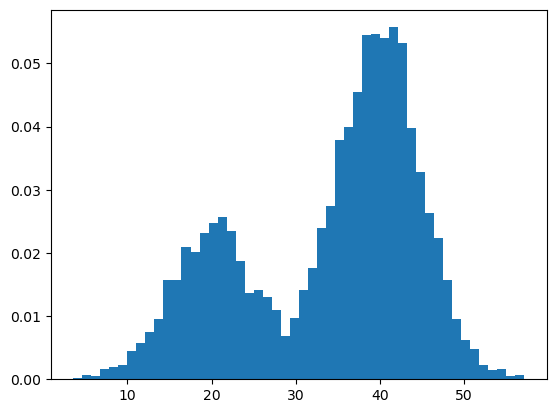

In [4]:
# example of a bimodal constructed from two gaussian processes
from numpy import hstack
from numpy.random import normal
from matplotlib import pyplot
# generate a sample
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))
# plot the histogram
pyplot.hist(X, bins=50, density=True)
pyplot.show()

In [6]:
# example of fitting a gaussian mixture model with expectation maximization
from numpy import hstack
from numpy.random import normal
from sklearn.mixture import GaussianMixture
# generate a sample
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))
# reshape into a table with one column
X = X.reshape((len(X), 1))
# fit model
model = GaussianMixture(n_components=2, init_params='random') 
model.fit(X)
# predict latent values
yhat = model.predict(X)
# check latent value for first few points
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
